In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Here we go again!!! 
## Time to get creative and help our fellow mates stuck in space!!! Come onnn, take my hand....

![saving](https://pyxis.nymag.com/v1/imgs/00a/407/065c31c680d938dd607e42f8f1f8b58c81-15-star-wars-best-moments-2.rsquare.w700.jpg)

In [ ]:
# import libraries to move forward and analyze the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Initial inspection of the data

In [ ]:
def change_path(path):
    if path:
        directory_train = '/kaggle/input/spaceship-titanic/train.csv'
        directory_test = '/kaggle/input/spaceship-titanic/test.csv'
    else:
        directory_train =  'train.csv'
        directory_test = 'test.csv'
    
    return directory_train, directory_test

In [ ]:
path = True

In [ ]:
train, test = change_path(path)

In [ ]:
train_df = pd.read_csv(train)

In [ ]:
test_df = pd.read_csv(test)

In [ ]:
train_df.head()

## Data Field Description

#### `PassengerId` - A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and `pp` is their number within the group. People in a group are often family members, but not always.
#### `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
#### `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
#### `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
#### `Destination` - The planet the passenger will be debarking to.
#### `Age` - The age of the passenger.
#### `VIP` - Whether the passenger has paid for special VIP service during the voyage.
#### `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
#### `Name` - The first and last names of the passenger.
#### `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [ ]:
train_df.shape  # Number of rows and columns in data

In [ ]:
train_df.describe()  # More information about numerical data

In [ ]:
train_df.info()  # information about all the columns

In [ ]:
train_df.isnull().sum()  # Total number of missing observations in the data

In [ ]:
space_torr = train_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(space_torr)

# Let's dig up each column out of the data and find out its story

# Homeplanet

In [ ]:
HomePlanet = train_df.HomePlanet

In [ ]:
print(f'{round(HomePlanet.isnull().sum() / len(HomePlanet) * 100 , 2)}% data is missing or {HomePlanet.isnull().sum()} values out of {len(HomePlanet)}')

#### 2.31% data is missing or 201 values out of 8693

In [ ]:
HomePlanet.describe()

In [ ]:
HomePlanet.value_counts()

In [ ]:
plt.figure(figsize=(12,8))
colors = sns.color_palette('mako')
explode = (0.05, 0.05, 0.05)
plt.pie(x = HomePlanet.value_counts().values, labels=HomePlanet.value_counts().index,
        explode=explode,startangle=90, colors=colors, shadow=True, autopct='%.0f%%')
plt.title('Distribution of passengers from different home planets')

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(x = HomePlanet, hue = train_df.Transported, palette="mako")
plt.title('Survival figures from different Home Planets', fontsize=15)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)
# Among the people in space, most of the people who survived and also who died are from Earth. But safest, departure seems to be the earth.

plt.subplot(2,2,2)
sns.countplot(x = HomePlanet, hue = train_df.CryoSleep, palette="mako")
plt.title('Survival figures from different Home Planets considering cryosleep', fontsize=14)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)
# majority of people who were in cryosleep survived in contrast to the people who were not.

plt.subplot(2,2,3)
sns.boxplot(x = HomePlanet, y = train_df.Age, hue = train_df.Transported,  palette="mako")
plt.title('Age range and Survival figures from different Home Planets', fontsize=14)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Age distribution', fontsize=15)

# Looks like Age is similarly distributed between different homeplanets and people who got transported.

plt.subplot(2,2,4)
sns.violinplot(x = HomePlanet, y = train_df.RoomService, hue= train_df.Transported, palette='mako')
plt.title('Room survice expenditure and Survival figures from different Home Planets', fontsize=13)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Room service expenditure', fontsize=15)
# Looks like people from Europa had a wonderful time and loves the hotel room service.



In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.violinplot(x = HomePlanet, y = train_df.VRDeck, hue= train_df.Transported, palette='mako')
plt.title('VR Deck expenditure and Survival figures from different Home Planets', fontsize=13)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('VR Deck expenditure', fontsize=15)

# People from Europa spent the most in VR Deck, enjoying and actually enjoying a virtual world. 

plt.subplot(2,2,2)
sns.violinplot(x = HomePlanet, y = train_df.FoodCourt, hue= train_df.Transported, palette='mako')
plt.title('Food court expenditure and Survival figures from different Home Planets', fontsize=13)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Food court expenditure', fontsize=15)
# So, the plot suggests that, people from Europa had more propensity to spend on Food court 

plt.subplot(2,2,3)
sns.violinplot(x = HomePlanet, y = train_df.ShoppingMall, hue= train_df.Transported, palette='mako')
plt.title('Shopping expenditure and Survival figures from different Home Planets', fontsize=13)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Shopping Mall expenditure', fontsize=15)
# People from Mars should have spent more time in shopping mall and people from Europa may have spent a little more time in shopping mall

plt.subplot(2,2,4)
sns.violinplot(x = HomePlanet, y = train_df.Spa, hue= train_df.Transported, palette='mako')
plt.title('Spa expenditure and Survival figures from different Home Planets', fontsize=13)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Spa expenditure', fontsize=15)
# There's not much pattern in spa spending and survival figures

# CryoSleep

#### Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

In [ ]:
Cryosleep = train_df.CryoSleep

In [ ]:
round(Cryosleep.isnull().sum()/len(Cryosleep)*100,2)

#### 2.5% data is missing or 217 values out of 8693

In [ ]:
Cryosleep.describe()

In [ ]:
Cryosleep.value_counts()

In [ ]:
plt.figure(figsize=(12,8))
colors = sns.color_palette('BuPu')
explode = (0.05,)*len(Cryosleep.value_counts().values)
plt.pie(x = Cryosleep.value_counts().values, labels=Cryosleep.value_counts().index, 
        colors=colors,explode=explode, startangle=90, shadow=True, autopct='%.0f%%')
plt.title('Distribution of passengers in Cryosleep')

In [ ]:
train_df.head()

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.countplot(x = Cryosleep, hue= train_df.Destination, palette='BuPu')
plt.title('People in Cryosleep segmented by Destination', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Number of passengers', fontsize=14)

plt.subplot(2,2,2)
sns.countplot(x=Cryosleep, hue=train_df.VIP, palette= 'BuPu')
plt.title('People in Cryosleep segmented by VIP status', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Number of passengers', fontsize=14)

plt.subplot(2,2,3)
sns.boxplot(x=Cryosleep, y = train_df.Age,hue=train_df.Transported, palette= 'BuPu')
plt.title('People of different age groups in Cryosleep', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Age distribution', fontsize=14)

plt.subplot(2,2,4)
sns.violinplot(x=Cryosleep, y = train_df.RoomService,hue=train_df.Transported, palette= 'BuPu').set(title='People in Cryosleep and room service expenditure')
plt.title('People in Cryosleep segmented by Room service', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Room service expenditure', fontsize=14)

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.violinplot(x = Cryosleep, y= train_df.VRDeck, hue= train_df.Transported, palette='BuPu')
plt.title('People in Cryosleep segmented by VR Deck', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('VR Deck expenditure', fontsize=14)

plt.subplot(2,2,2)
sns.violinplot(x = Cryosleep, y= train_df.FoodCourt, hue= train_df.Transported, palette='BuPu')
plt.title('People in Cryosleep segmented by Food Court', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Food court expenditure', fontsize=14)

plt.subplot(2,2,3)
sns.violinplot(x=Cryosleep, y = train_df.ShoppingMall,hue=train_df.Transported, palette= 'BuPu')
plt.title('People of in Cryosleep segmented by Shopping Mall', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Shopping Mall expenditure', fontsize=14)

plt.subplot(2,2,4)
sns.violinplot(x=Cryosleep, y = train_df.Spa,hue=train_df.Transported, palette= 'BuPu')
plt.title('People in Cryosleep segmented by Spa', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Spa expenditure', fontsize=14)

##### As expected, people who are in cryosleep are confined to their cabin and are not involved in liesure activities 

# Cabin

#### The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [ ]:
Cabin = train_df.Cabin

In [ ]:
print(f'{round(Cabin.isnull().sum()/len(Cabin)*100,2)}% data is missing or {Cabin.isnull().sum()} values out of {len(Cabin)}')

#### 2.29% data is missing or 199 values out of 8693

In [ ]:
Cabin.describe() 
# There are a lot of different cabins in the spaceship and it is of type object 

In [ ]:
# Let's break up the cabin into different segments to access more granular data and analyze it further. We can break it up into three different
# segments such as cabin_deck, cabin_nume, cabin_side

train_df['cabin_deck'] = train_df.loc[:,'Cabin'].dropna().apply(lambda cabin: str(cabin).split('/')[0])
train_df['cabin_num'] = train_df.loc[:,'Cabin'].dropna().apply(lambda cabin: int(str(cabin).split('/')[1]))
train_df['cabin_side'] = train_df.loc[:,'Cabin'].dropna().apply(lambda cabin: str(cabin).split('/')[2])
test_df['cabin_deck'] = test_df.loc[:,'Cabin'].dropna().apply(lambda cabin: str(cabin).split('/')[0])
test_df['cabin_num'] = test_df.loc[:,'Cabin'].dropna().apply(lambda cabin: int(str(cabin).split('/')[1]))
test_df['cabin_side'] = test_df.loc[:,'Cabin'].dropna().apply(lambda cabin: str(cabin).split('/')[2])

In [ ]:
# Now I think we can drop the cabin column and insert our new columns in that place
train_df.drop('Cabin',axis=1, inplace=True)
test_df.drop('Cabin',axis=1, inplace=True)

In [ ]:
train_df.insert(3, 'cabin_Deck', train_df.cabin_deck)
train_df.insert(4, 'cabin_Num', train_df.cabin_num)
train_df.insert(5, 'cabin_Side', train_df.cabin_side)
train_df.drop(['cabin_num','cabin_deck','cabin_side'], axis=1, inplace=True)
test_df.insert(3, 'cabin_Deck', test_df.cabin_deck)
test_df.insert(4, 'cabin_Num', test_df.cabin_num)
test_df.insert(5, 'cabin_Side', test_df.cabin_side)
test_df.drop(['cabin_num','cabin_deck','cabin_side'], axis=1, inplace=True)

# Cabin Decks

In [ ]:
plt.figure(figsize=(12,8))
colors = sns.color_palette('CMRmap')
explode = (0.07,)*len(train_df.cabin_Deck.value_counts().values)
plt.pie(x = train_df.cabin_Deck.value_counts().values, labels=train_df.cabin_Deck.value_counts().index, 
        colors=colors, shadow=True, explode=explode, startangle=45,autopct='%.0f%%')
plt.title('Distribution of passengers in different cabin decks')

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.countplot(x=train_df.cabin_Deck, palette='CMRmap')
plt.title('Number of people in different cabin decks', fontsize=15)
plt.xlabel('Cabin Decks', fontsize=14)
plt.ylabel('Number of passengers', fontsize=14)

plt.subplot(2,2,2)
sns.countplot(x=train_df.cabin_Deck, hue=HomePlanet, palette='CMRmap')
plt.title('People in different decks embarking from different planets', fontsize=15)
plt.xlabel('Cabin Decks', fontsize=14)
plt.ylabel('Number of passengers', fontsize=14)

plt.subplot(2,2,3)
sns.countplot(x=train_df.cabin_Deck, hue=Cryosleep, palette='CMRmap').set(title='Transport status for people in diffrenet deck number and whether they were in cryo sleep')
plt.title('Transport status for people in diffrenet deck number and whether they were in cryo sleep', fontsize=12)
plt.xlabel('Cabin Decks', fontsize=14)
plt.ylabel('Number of passengers', fontsize=14)


plt.subplot(2,2,4)
sns.countplot(x=train_df.cabin_Deck, hue=train_df.Destination, palette='CMRmap').set(title='Number of people in different cabin decks and different destinations')
plt.title('Number of people in different cabin decks and different destinations', fontsize=13)
plt.xlabel('Cabin Decks', fontsize=14)
plt.ylabel('Number of passengers', fontsize=14)

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.boxplot(x=train_df.cabin_Deck, y = train_df.cabin_Num, hue= train_df.Transported, palette='CMRmap').set(title='Number of people in different cabin decks and different cabin numbers with transporation status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Number of passengers', fontsize =13)

plt.subplot(2,2,2)
sns.countplot(x=train_df.cabin_Deck, hue= train_df.cabin_Side, palette='CMRmap').set(title='Number of people in different cabin decks with cabin sides')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Number of passengers', fontsize =13)

plt.subplot(2,2,3)
sns.violinplot(x=train_df.cabin_Deck, y = train_df.Age, hue=train_df.Transported, palette='CMRmap').set(title='Age distribution of people in different deck numbers')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Age distribution', fontsize =13)

plt.subplot(2,2,4)
sns.boxplot(x=train_df.cabin_Deck, y = train_df.RoomService, hue=train_df.Transported, palette='CMRmap').set(title='Number of people in different cabin decks with expenditure on room service and transportation status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Room service expenditure', fontsize =13)

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.boxplot(x=train_df.cabin_Deck, y = train_df.Spa, hue= train_df.Transported, palette='CMRmap').set(title='Number of people in different cabin decks with expenditure on Spa and transportation status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Spa expenditure', fontsize =13)

plt.subplot(2,2,2)
sns.violinplot(x=train_df.cabin_Deck, y = train_df.ShoppingMall, hue=train_df.Transported, palette='CMRmap').set(title = 'Number of people in different cabin decks with expenditure at Shopping Mall and transportation status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Shopping Mall expenditure', fontsize =13)

plt.subplot(2,2,3)
sns.violinplot(x=train_df.cabin_Deck, y = train_df.VRDeck, hue=train_df.Transported, palette='CMRmap').set(title = 'Number of people in different cabin decks with expenditure at VR and transportation status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('VR Deck expenditure', fontsize =13)

plt.subplot(2,2,4)
sns.countplot(x=train_df.cabin_Deck, hue=train_df.VIP, palette='CMRmap').set(title = 'Number of people in different decks and having different VIP status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Number of passengers', fontsize =13)

# Cabin Sides

#### Either Port or Starboard side

In [ ]:
round(train_df.cabin_Side.isnull().sum()/len(train_df.cabin_Side)*100,2)

### 2.29% data is missing or 199 values out of 8693

In [ ]:
train_df.cabin_Side.value_counts()

In [ ]:
plt.figure(figsize=(12,8))
colors = sns.color_palette('afmhot_r')
explode = (0.04,)*len(train_df.cabin_Side.value_counts().values)
plt.pie(x = train_df.cabin_Side.value_counts().values, labels=train_df.cabin_Side.value_counts().index, 
        explode = explode, startangle=60,  colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of passengers in different cabin sides')

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.countplot(x=train_df.cabin_Side, hue = train_df.Transported, palette='afmhot_r').set(title='Number of people in different cabin sides')
plt.xlabel('Cabin sides', fontsize =13)
plt.ylabel('Number of Passengers', fontsize =13)

plt.subplot(2,2,2)
sns.countplot(x=train_df.cabin_Side, hue=HomePlanet, palette='afmhot_r').set(title='People in different deck sides embarking from different planets')
plt.xlabel('Cabin sides', fontsize =13)
plt.ylabel('Number of Passengers', fontsize =13)

plt.subplot(2,2,3)
sns.countplot(x=train_df.cabin_Side, hue=Cryosleep, palette='afmhot_r').set(title='Transport status for people in diffrenet deck sides and whether they were in cryo sleep')
plt.xlabel('Cabin sides', fontsize =13)
plt.ylabel('Number of Passengers', fontsize =13)

plt.subplot(2,2,4)
sns.countplot(x=train_df.cabin_Side, hue=train_df.Destination, palette='afmhot_r').set(title='Number of people in different cabin sides and different destinations')
plt.xlabel('Cabin sides', fontsize =13)
plt.ylabel('Number of Passengers', fontsize =13)

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.boxplot(x=train_df.cabin_Side, y = train_df.cabin_Num, hue= train_df.Transported, palette='afmhot_r')
plt.title('Number of people in different cabin sides and different cabin numbers', fontsize =13)
plt.xlabel('Cabin sides', fontsize =15)
plt.ylabel('Cabin Numbers', fontsize =15)

plt.subplot(2,2,2)
sns.countplot(x=train_df.cabin_Side, hue= train_df.cabin_Deck, palette='afmhot_r')
plt.title('Number of people in different cabin decks with cabin sides', fontsize =13)
plt.xlabel('Cabin sides', fontsize =15)
plt.ylabel('Cabin Decks', fontsize =15)

plt.subplot(2,2,3)
sns.boxplot(x=train_df.cabin_Side, y = train_df.Age, hue=train_df.Transported, palette='afmhot_r')
plt.title('Age distribution of people in different deck sides', fontsize =14)
plt.xlabel('Cabin sides', fontsize =15)
plt.ylabel('Age distribution', fontsize =15)

plt.subplot(2,2,4)
sns.boxplot(x=train_df.cabin_Side, y = train_df.RoomService, hue=train_df.Transported, palette='afmhot_r')
plt.title('Number of people in different cabin sides with expenditure on room service', fontsize =14)
plt.xlabel('Cabin sides', fontsize =15)
plt.ylabel('Room Service expenditure', fontsize =15)

In [ ]:
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
sns.boxplot(x=train_df.cabin_Side, y = train_df.Spa, hue= train_df.Transported, palette='afmhot_r')
plt.title('Number of people in different cabin sides with expenditure at Spa', fontsize =14)
plt.xlabel('Cabin sides', fontsize=15)
plt.ylabel('Spa Expenditure', fontsize=15)

plt.subplot(2,2,2)
sns.violinplot(x=train_df.cabin_Side, y = train_df.ShoppingMall, hue=train_df.Transported, palette='afmhot_r')
plt.title('Number of people in different cabin sides with expenditure at Shopping Mall', fontsize =14)
plt.xlabel('Cabin sides', fontsize=15)
plt.ylabel('Shopping Mall Expenditure', fontsize=15)

plt.subplot(2,2,3)
sns.violinplot(x=train_df.cabin_Side, y = train_df.VRDeck, hue=train_df.Transported, palette='afmhot_r')
plt.title('Number of people in different cabin sides with expenditure at VR', fontsize =14)
plt.xlabel('Cabin sides', fontsize=15)
plt.ylabel('VR Deck Expenditure', fontsize=15)


plt.subplot(2,2,4)
sns.countplot(x=train_df.cabin_Side, hue=train_df.VIP, palette='afmhot_r')
plt.title('Number of people in different decks sids and having different VIP status', fontsize =14)
plt.xlabel('Cabin sides', fontsize=15)
plt.ylabel('VIP Status', fontsize=15)

# Cabin Number

In [ ]:
round(train_df.cabin_Num.isnull().sum()/len(train_df.cabin_Num)*100,2)

### 2.29% data is missing or 199 values out of 8693

In [ ]:
train_df.cabin_Num.value_counts()

In [ ]:
plt.figure(figsize=(12,8))
plt.hist2d(x = train_df.cabin_Num.value_counts().index.map(int), y = train_df.cabin_Num.value_counts().values)
plt.title('Passengers in different cabin numbers', fontsize = 20)
plt.xlabel('Cabin Numbers', fontsize = 14)
plt.ylabel('Passenger count', fontsize=14)

# As we see most of the passengers resided in deck numbers ranging from 50 to 500

In [ ]:
train_df[(train_df.cabin_Num > 0) & (train_df.cabin_Num < 800)]['cabin_Deck']

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x=train_df[(train_df.cabin_Num > 0) & (train_df.cabin_Num < 800)]['cabin_Deck'], hue=train_df.Transported, palette=sns.color_palette('icefire_r'))
plt.xlabel('Cabin Decks between 0 to 800 cabin numbers', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=13)
plt.title('Passengers in cabin number from 0 to 800 in different decks and Transport status', fontsize=13)

plt.subplot(1,2,2)
sns.countplot(x=train_df[train_df.cabin_Num > 800]['cabin_Deck'], hue=train_df.Transported,palette=sns.color_palette('icefire_r'))
plt.title('Passengers in cabin number above 800 in different decks and Transport status', fontsize=13)
plt.xlabel('Cabin Decks above 800 cabin numbers', fontsize=13)
plt.ylabel('Number of Passengers', fontsize=13)

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x=train_df[(train_df.cabin_Num > 0) & (train_df.cabin_Num < 800)]['cabin_Side'], hue=train_df.Transported, palette=sns.color_palette('icefire_r'))
plt.xlabel('Cabin Sides between 0 to 800 cabin numbers', fontsize=13)
plt.title('Passengers in cabin number from 0 to 800 in different sides and Transport status', fontsize=13)
plt.ylabel('Number of Passengers', fontsize=13)


plt.subplot(1,2,2)
sns.countplot(x=train_df[train_df.cabin_Num > 800]['cabin_Side'], hue=train_df.Transported,palette=sns.color_palette('icefire_r'))
plt.title('Passengers in cabin number above 800 in different sides and Transport status', fontsize=13)
plt.xlabel('Cabin Sides above 800 cabin numbers', fontsize=13)
plt.ylabel('Number of Passengers', fontsize=13)

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x=train_df[(train_df.cabin_Num > 0) & (train_df.cabin_Num < 1000)]['HomePlanet'], hue=train_df.Transported, palette=sns.color_palette('icefire_r'))
plt.xlabel('Home planets for passengers in cabin numbers between 0 to 1000', fontsize=13)
plt.ylabel('Number of Passengers', fontsize=13)

plt.title('Passengers in cabin number from 0 to 1000 from different home planets and Transport status', fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x=train_df[train_df.cabin_Num > 1000]['HomePlanet'], hue=train_df.Transported,palette=sns.color_palette('icefire_r'))
plt.title('Passengers in cabin number above 1000 from different home planets and Transport status', fontsize=12)
plt.xlabel('Home planets for passengers in cabin numbers above 1000', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=13)

# Destination
### The planet the passenger will be debarking to.


In [ ]:
destination = train_df.Destination

In [ ]:
print(f'{round(destination.isnull().sum()/len(destination)*100,2)}% data is missing or {destination.isnull().sum()} values out of {len(destination)}')

### 2.09% data is missing or 182 values out of 8693

In [ ]:
destination.value_counts()

In [ ]:
plt.figure(figsize=(12,8))
color = sns.color_palette('plasma_r')
explode = (0.05,)*len(destination.value_counts().values)
plt.pie(x = destination.value_counts().values, labels=destination.value_counts().index, autopct='%1.1f%%', 
        explode=explode, startangle=90, colors=color,shadow=True)
plt.title('Chart showing number of passengers to different destinations', fontsize = 14)

In [ ]:
train_df.head()

In [ ]:
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(destination, hue=HomePlanet, palette=color)
plt.title('Passengers from different home planets to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)

plt.subplot(2,2,2)
sns.countplot(destination, hue=train_df.cabin_Deck, palette = color)
plt.title('Passengers to their destinations in different cabin decks', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)

plt.subplot(2,2,3)
sns.countplot(destination, hue=train_df.VIP ,palette = color)
plt.title('Passengers to their destinations with VIP status', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)

plt.subplot(2,2,4)
sns.boxplot(x = destination, y=train_df.RoomService ,hue = train_df.Transported, palette = color)
plt.title('Expenditure on Room Service for passengers to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Expenditure on Room Service', fontsize=15)

In [ ]:
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
sns.boxplot(x = destination, y=train_df.Spa ,hue = train_df.Transported, palette = color)
plt.title('Expenditure on Spa service for passengers to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Spa expenditure', fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x = destination, y=train_df.ShoppingMall ,hue = train_df.Transported, palette = color)
plt.title('Expenditure at Shopping for passengers to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Shopping Mall expenditure', fontsize=15)

plt.subplot(2,2,3)
sns.boxplot(x = destination, y=train_df.VRDeck ,hue = train_df.Transported, palette = color)
plt.title('VR Deck Expenditure for passengers to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('VR Deck expenditure', fontsize=15)

plt.subplot(2,2,4)
sns.boxplot(x = destination, y=train_df.Age ,hue = train_df.Transported, palette = color)
plt.title('Age distribution of  passengers to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Age', fontsize=15)

# Age
### The age of the passenger.

In [ ]:
age = train_df.Age

In [ ]:
print(f'{round(age.isnull().sum()/len(age)*100,2)}% data is missing or {age.isnull().sum()} values out of {len(age)}')

### 2.06% data is missing or 179 values out of 8693

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(age, bins=20 , color=sns.color_palette('Dark2_r')[2],kde=True)
plt.title('Age Distribution', fontsize = 16)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Number of Passengers', fontsize = 16)

In [ ]:
train_df.head()

In [ ]:
plt.figure(figsize=(20,15))
color=sns.color_palette('Dark2_r')

plt.subplot(2,2,1)
sns.scatterplot(x = age, y = train_df.RoomService, hue=train_df.Transported, palette=color[1:3], s=65, alpha = 0.7)
plt.title('Age vs Room Service expenditure', fontsize = 15)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Room Service Expenditure', fontsize = 16)

plt.subplot(2,2,2)
sns.scatterplot(x = age, y = train_df.Spa, hue=train_df.Transported, palette=color[1:3], s=65, alpha = 0.7)
plt.title('Age vs Spa expenditure', fontsize = 15)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Spa Expenditure', fontsize = 16)

plt.subplot(2,2,3)
sns.scatterplot(x = age, y = train_df.ShoppingMall, hue=train_df.Transported, palette=color[1:3], s=65, alpha = 0.7)
plt.title('Age vs Shopping Mall expenditure', fontsize = 15)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Shopping Mall Expenditure', fontsize = 16)

plt.subplot(2,2,4)
sns.scatterplot(x = age, y = train_df.VRDeck, hue=train_df.Transported, palette=color[1:3], s=70, alpha = 0.7)
plt.title('Age vs VR Deck expenditure', fontsize = 15)
plt.xlabel('Age', fontsize=16)
plt.ylabel('VR Deck Expenditure', fontsize = 16)

# VIP
### Whether the passenger has paid for special VIP service during the voyage.

In [ ]:
vip = train_df.VIP

In [ ]:
print(f'{round(vip.isnull().sum()/len(vip)*100,2)}% data is missing or {vip.isnull().sum()} values out of {len(vip)}')

### 2.34% data is missing or 203 values out of 8693

In [ ]:
plt.figure(figsize=(12,8))
explode = (0.05, 0.5)
plt.pie(x = vip.value_counts().values, labels=vip.value_counts().index, autopct='%1.1f%%', 
        explode=explode, startangle=45, colors=sns.color_palette('vlag_r')[3:5])
plt.title('Chart showing VIP status of passengers', fontsize=16)

In [ ]:
train_df.head()

In [ ]:
plt.figure(figsize=(20,15))
palette = sns.color_palette('vlag_r')[3:6]

plt.subplot(2,2,1)
sns.violinplot(x = vip,y = age, hue=train_df.Transported, palette=palette)
plt.title('VIP status and age distribution', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Age Distribution', fontsize=15)

plt.subplot(2,2,2)
sns.countplot(x = vip, hue=train_df.Transported, palette=palette)
plt.title('VIP status and Transport distribution', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)

plt.subplot(2,2,3)
sns.violinplot(x = vip, y = train_df.RoomService, hue = train_df.Transported, palette=palette)
plt.title('VIP status and Room service expenditure', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Room service expenditure', fontsize=15)


plt.subplot(2,2,4)
sns.violinplot(x = vip, y = train_df.ShoppingMall, hue = train_df.Transported, palette=palette)
plt.title('VIP status and Shopping Mall expenditure', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Shopping Mall expenditure', fontsize=15)


In [ ]:
train_df.head()

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.violinplot(x = vip, y = train_df.Spa, hue=train_df.Transported, palette=palette)
plt.title('VIP Status and Spa Expenditure', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Spa Expenditure', fontsize=15)

plt.subplot(1,2,2)
sns.violinplot(x = vip, y = train_df.VRDeck, hue = train_df.Transported, palette=palette)
plt.title('VIP Status and Spa Expenditure', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Spa Expenditure', fontsize=15)

# Room Service
### Amount the passenger has billed at Room Service of the Spaceship Titanic.

In [ ]:
roomservice = train_df.RoomService

In [ ]:
train_df.head()

In [ ]:
print(f'{round(roomservice.isnull().sum()/len(roomservice)*100,2)}% data is missing or {roomservice.isnull().sum()} values out of {len(roomservice)}')

### 2.08% data is missing or 181 values out of 8693

In [ ]:
plt.figure(figsize=(10,6))
palette = sns.color_palette('viridis_r')
sns.histplot(x = roomservice, bins=30, color=sns.color_palette('viridis_r')[4], kde=True)
plt.title('Room Service Distribution', fontsize = 16)
plt.xlabel('Room Service expenditure', fontsize=16)
plt.ylabel('Number of passengers', fontsize=16)

In [ ]:
plt.figure(figsize=(20,15))
color=sns.color_palette('terrain_r')

plt.subplot(2,2,1)
sns.scatterplot(x = roomservice, y = train_df.FoodCourt, hue=train_df.Transported, palette=color[4:], s=65, alpha = 0.7)
plt.title('Food Court vs Room Service expenditure', fontsize = 15)
plt.xlabel('Room Service Expenditure', fontsize=16)
plt.ylabel('Food Court expenditure', fontsize = 16)

plt.subplot(2,2,2)
sns.scatterplot(x = roomservice, y = train_df.Spa, hue=train_df.Transported, palette=color[4:], s=65, alpha = 0.7)
plt.title('Room Service vs Spa expenditure', fontsize = 15)
plt.xlabel('Room Service expenditure', fontsize=16)
plt.ylabel('Spa Expenditure', fontsize = 16)

plt.subplot(2,2,3)
sns.scatterplot(x = roomservice, y = train_df.ShoppingMall, hue=train_df.Transported, palette=color[4:], s=65, alpha = 0.7)
plt.title('Room Service vs Shopping Mall expenditure', fontsize = 15)
plt.xlabel('Room Service expenditure', fontsize=16)
plt.ylabel('Shopping Mall Expenditure', fontsize = 16)

plt.subplot(2,2,4)
sns.scatterplot(x = roomservice, y = train_df.VRDeck, hue=train_df.Transported, palette=color[4:], s=70, alpha = 0.7)
plt.title('Room Service vs VR Deck expenditure', fontsize = 15)
plt.xlabel('Room Service expenditure', fontsize=16)
plt.ylabel('VR Deck Expenditure', fontsize = 16)

# Food Court
### Amount the passenger has billed at Food Court of the Spaceship Titanic.


In [ ]:
foodcourt = train_df.FoodCourt

In [ ]:
print(f'{round(train_df.FoodCourt.isnull().sum()/len(train_df.FoodCourt)*100,2)}% data is missing or {train_df.FoodCourt.isnull().sum()} values out of {len(train_df.FoodCourt)}')

### 2.11% data is missing or 183 values out of 8693

In [ ]:
plt.figure(figsize=(20,15))
color=sns.color_palette('tab20c')

plt.subplot(2,2,1)
sns.histplot(x = foodcourt, bins = 20, color=color[3],kde=True)
plt.title('Food Court distribution', fontsize = 16)
plt.xlabel('Food Court Expenditure', fontsize=16)
plt.ylabel('Number of passengers', fontsize = 16)

plt.subplot(2,2,2)
sns.scatterplot(x = foodcourt, y = train_df.Spa, hue=train_df.Transported, palette=color[3:5], s=65, alpha = 0.8)
plt.title('Food Court vs Spa expenditure', fontsize = 15)
plt.xlabel('Food court expenditure', fontsize=16)
plt.ylabel('Spa Expenditure', fontsize = 16)

plt.subplot(2,2,3)
sns.scatterplot(x = foodcourt, y = train_df.ShoppingMall, hue=train_df.Transported, palette=color[3:5], s=65, alpha = 0.8)
plt.title('Food Court vs Shopping Mall expenditure', fontsize = 15)
plt.xlabel('Food Court expenditure', fontsize=16)
plt.ylabel('Shopping Mall Expenditure', fontsize = 16)

plt.subplot(2,2,4)
sns.scatterplot(x = foodcourt, y = train_df.VRDeck, hue=train_df.Transported, palette=color[3:5], s=70, alpha = 0.8)
plt.title('Food court vs VR Deck expenditure', fontsize = 15)
plt.xlabel('Food court expenditure', fontsize=16)
plt.ylabel('VR Deck Expenditure', fontsize = 16)

# Shopping Mall
### Amount the passenger has billed at Shopping Mall of the Spaceship Titanic.


In [ ]:
shop = train_df.ShoppingMall

In [ ]:
print(f'{round(shop.isnull().sum()/len(shop)*100,2)}% data is missing or {shop.isnull().sum()} values out of {len(shop)}')

### 2.39% data is missing or 208 values out of 8693


In [ ]:
plt.figure(figsize=(20,15))
color=sns.color_palette('seismic')

plt.subplot(2,2,1)
sns.histplot(x = shop, bins = 30,  color=color[3],kde=True)
plt.title('Shopping Mall distribution', fontsize = 16)
plt.xlabel('Shopping Mall Expenditure', fontsize=16)
plt.ylabel('Number of passengers', fontsize = 16)

plt.subplot(2,2,2)
sns.scatterplot(x = shop, y = train_df.Spa, hue=train_df.Transported, palette=color[3:5], s=65, alpha = 0.8)
plt.title('Shopping Mall vs Spa expenditure', fontsize = 15)
plt.xlabel('Shopping Mall expenditure', fontsize=16)
plt.ylabel('Spa Expenditure', fontsize = 16)

plt.subplot(2,2,3)
sns.boxplot(x = train_df.Transported, y = shop, palette=color[3:5],)
plt.title('Shopping Mall expenditure and Transportation Status', fontsize = 15)
plt.xlabel('Transport', fontsize=16)
plt.ylabel('Number of passengers', fontsize = 16)

plt.subplot(2,2,4)
sns.scatterplot(x = shop, y = train_df.VRDeck, hue=train_df.Transported, palette=color[3:5], s=70, alpha = 0.8)
plt.title('Shopping Mall vs VR Deck expenditure', fontsize = 15)
plt.xlabel('Shopping Mall expenditure', fontsize=16)
plt.ylabel('VR Deck Expenditure', fontsize = 16)

# Spa 
### Amount the passenger has billed at Spa of the Spaceship Titanic.


In [ ]:
print(f'{round(train_df.Spa.isnull().sum()/len(train_df.Spa)*100,2)}% data is missing or {train_df.Spa.isnull().sum()} values out of {len(train_df.Spa)}')

### 2.11% data is missing or 183 values out of 8693

In [ ]:
train_df.tail()

In [ ]:
plt.figure(figsize=(20,6))
color = sns.color_palette('prism_r')

plt.subplot(1,2,1)
sns.histplot(x = train_df.Spa, bins = 30,  color=color[3],kde=True)
plt.title('Spa distribution', fontsize = 16)
plt.xlabel('Spa Expenditure', fontsize=16)
plt.ylabel('Number of passengers', fontsize = 16)

plt.subplot(1,2,2)
sns.scatterplot(x = train_df.Spa, y = train_df.VRDeck, hue=train_df.Transported, palette=color[1:3])
plt.title('VR Deck and Spa Expenditure', fontsize = 15)
plt.xlabel('Spa expenditure', fontsize=15)
plt.ylabel('VR Deck Expenditure', fontsize=15)


# Data Preprocessing

![](https://editor.analyticsvidhya.com/uploads/443081_Xhm9c9qDfXa3ZCQjiOvm_w.jpeg)

## Handling Missing Data

In [ ]:
transported = train_df.pop('Transported')

In [ ]:
test_pass_id = test_df['PassengerId']

In [ ]:
train_pass_id = train_df['PassengerId']

In [ ]:
train_df['is_train'] = True
test_df['is_train'] = False

df = pd.concat([train_df, test_df])

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
# Let's drop the name and passenger id column now because it doesn't make any useful contribution to our model and we keep it for future engineering
name = df.pop('Name')
pass_id = df.pop('PassengerId')

In [ ]:
from sklearn.compose import make_column_transformer, make_column_selector

In [ ]:
selector = make_column_selector(dtype_include=object)
categorical_data_columns = selector(df)
cat_train_data = df[categorical_data_columns]
cat_train_data.head()

In [ ]:
con_selector = make_column_selector(dtype_exclude=[object, bool])
continuous_data_columns = con_selector(df)
cont_train_data = df[continuous_data_columns]
cont_train_data.head()

https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values= np.nan ,strategy='mean')
imputer = imputer.fit(df[continuous_data_columns])
df[continuous_data_columns] = imputer.transform(df[continuous_data_columns])

In [ ]:
mode_imputer = SimpleImputer(missing_values= np.nan , strategy='most_frequent')
mode_imputer = mode_imputer.fit(df[categorical_data_columns])
df[categorical_data_columns] = mode_imputer.transform(df[categorical_data_columns])

In [ ]:
df.info()

## Label encoding of categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def label_encode(df,col):
    df[col] = LabelEncoder().fit_transform(df[col])
    return df[col]

In [ ]:
categorical_data_columns

In [ ]:
for col in categorical_data_columns:
    df[col] = label_encode(df,col)

In [ ]:
df.info()

## Numeric Data Normalization 

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# The transformation is given as below
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

In [ ]:
minmax_scaler = MinMaxScaler()

In [ ]:
scaler = StandardScaler()

In [ ]:
continuous_data_columns

In [ ]:
for col in continuous_data_columns:
    df[col] = minmax_scaler.fit_transform(np.array(df[col]).reshape(-1,1))

In [ ]:
df['cabin_Deck'] = minmax_scaler.fit_transform(np.array(df['cabin_Deck']).reshape(-1,1))

In [ ]:
df

In [ ]:
separate = df['is_train'] == True
train_df = df[separate]
test_df = df[~separate]

In [ ]:
train_df = train_df.drop('is_train', axis=1)
print(train_df.shape)
train_df.head()

In [ ]:
test_df = test_df.drop('is_train', axis=1)
print(test_df.shape)
test_df.head()

In [ ]:
plt.figure(figsize=(12,7))
torr = train_df.corr()
sns.heatmap(torr)

# Base Classifier

In [ ]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [ ]:
logrcv = LogisticRegressionCV(Cs=[1,3,5,7,10], cv=5, penalty='l2', random_state=2022)

In [ ]:
y_train = transported.apply(lambda x : 1.0 if x == True else 0.0)

In [ ]:
y_train.value_counts()

In [ ]:
fitted = logrcv.fit(X= train_df, y = y_train)

In [ ]:
fitted.C_

In [ ]:
fitted.scores_

In [ ]:
fitted.coef_

In [ ]:
logr = LogisticRegression(C=20)

In [ ]:
fit_train = logr.fit(train_df, y_train)

In [ ]:
predictions = fit_train.predict(test_df)

In [ ]:
def generate_submission(preds):
    test_arr = np.column_stack((test_pass_id.values, preds) )
    test_predict = pd.DataFrame(columns = ['PassengerId', 'Transported'], data = test_arr)
    test_predict.Transported = test_predict.Transported.apply(lambda x : True if x == 1.0 else False)
    test_predict.head()
    test_predict.to_csv('submission.csv', index=False)

In [ ]:
generate_submission(predictions)

### Classification score is: 0.78770 

### We can improve it further

###  Till now, I have set up the data good enough for training a model. Steps were to Explore the data through visualization, Handle missing data (filled the data with mode/mean), perform one hot encoding on categorical variables, normalize numeric data. Now, let's do some feature engineering to try to boost the performance with the help of the data.

## Let's try different algorithms 
### 1. Knearest Neighbors
### 2. Decision Trees
### 3. Random Forests
### 4. Support Vector Machines
### 5. XGBoost
 

# KNN

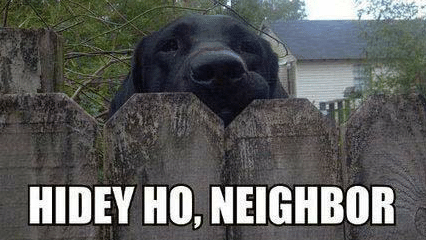

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

X_train = train_df
Y_train = y_train

TRAIN_SCORES = []
VALID_SCORES  = [] 


params = list(range(1,20))

classifier = KNeighborsClassifier()

folds = 5

kf = KFold(n_splits=folds)

for p in params:

    training_scores = []
    crossval_scores = []
    classifier.n_neighbors = p

    for i in range(folds):
        
        result = next(kf.split(X_train),None)
        x_training = X_train.iloc[result[0]]
        x_cv = X_train.iloc[result[1]]

        y_training = y_train.iloc[result[0]]
        y_cv = y_train.iloc[result[1]]
      
        model = classifier.fit(x_training,y_training)
        training_scores.append(model.score(x_training,y_training))
        crossval_scores.append(model.score(x_cv,y_cv))
    TRAIN_SCORES.append(np.mean(training_scores))
    VALID_SCORES.append(np.mean(crossval_scores))

In [ ]:
plt.plot(params,TRAIN_SCORES, label='train cruve')
plt.plot(params,VALID_SCORES, label='test cruve')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title('Hyper-parameter VS accuracy plot')

In [ ]:
np.argmax(np.array(VALID_SCORES))

In [ ]:
# Looks like the best neighbor is 5
KNN_best = KNeighborsClassifier(18,weights='uniform', )
model_best = KNN_best.fit(train_df, y_train)

preds = model_best.predict(test_df)


In [ ]:
model_best.get_params()

In [ ]:
generate_submission(preds)

# Decision Tree Classifier

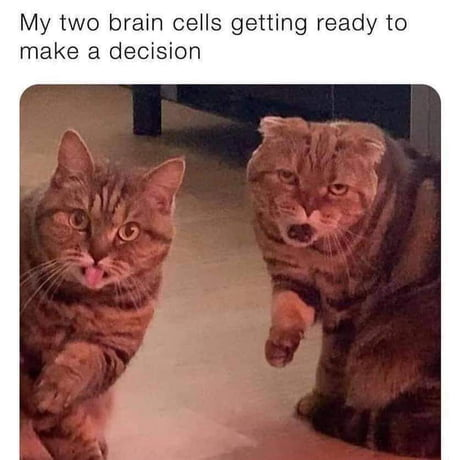

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
params_dict = {'criterion':['gini', 'entropy'],
              'max_depth': [10,20,30,40,50,60],
              'min_samples_split':[0.1,0.3,0.5,0.6]}

In [ ]:
clf =  DecisionTreeClassifier(random_state=2022)

In [ ]:
grid_clf = GridSearchCV(clf, param_grid=params_dict,cv=5, verbose=1, refit=True)

In [ ]:
grid_clf.fit(X=train_df, y =  y_train)

In [ ]:
grid_clf.best_params_

In [ ]:
grid_clf.predict(test_df)

In [ ]:
generate_submission(grid_clf.predict(test_df))

# Random Forest Classifier

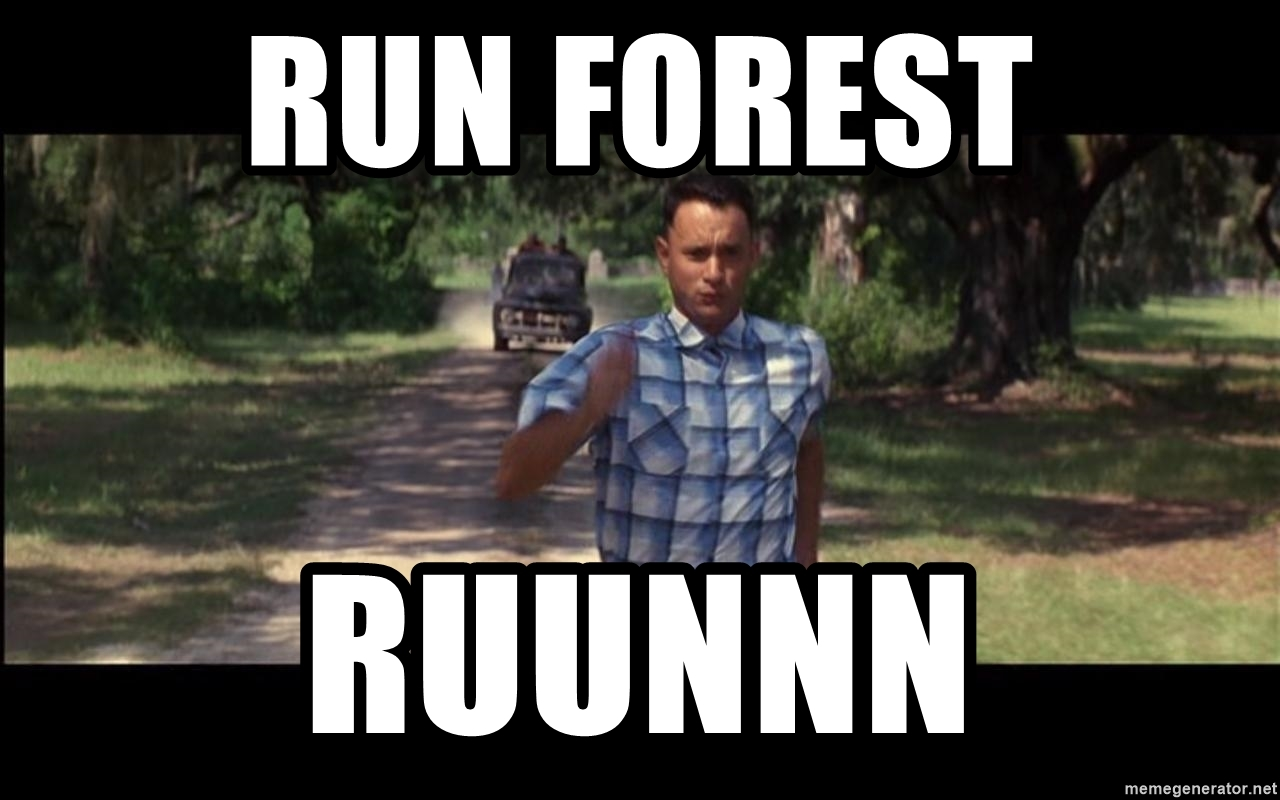

In [ ]:
params_dict_rf = {'max_depth': [20,30,40,50,60],
                  'min_samples_split':[0.1,0.3,0.5,0.6],
                 'max_features':[3,5,8,13],
                 'n_estimators':[100, 200, 400, 500]}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, bootstrap=True, 
                            oob_score=True , random_state=2022, verbose=0 )


In [ ]:
#grid_rf = GridSearchCV(rf, param_grid=params_dict_rf)
#grid_rf.fit(X = train_df, y = y_train)

In [ ]:
#grid_rf.best_estimator_

In [ ]:
#grid_rf.best_params_

In [ ]:
#grid_rf.feature_names_in_

In [ ]:
rf = RandomForestClassifier(n_estimators=500, max_depth=12,  bootstrap=True,
                            oob_score=True, random_state=2022, verbose=0)

In [ ]:
rf.fit(X=train_df, y =y_train)

In [ ]:
rf.oob_score_

In [ ]:
rf_predictions = rf.predict(test_df)

In [ ]:
generate_submission(rf_predictions)

# Support Vector Machines

![](https://editor.analyticsvidhya.com/uploads/30927SVM%201.png)

In [ ]:
from sklearn.svm import SVC, NuSVC

In [ ]:
grid_svc = {'C': [1,2,3,5,8,10],
           'kernel': ['linear', 'rbf', 'poly'],
           'gamma': ['auto','scale']}

In [ ]:
svc = SVC()

In [ ]:
grid_svc = GridSearchCV(svc, param_grid=grid_svc, refit=True, cv=10 )

In [ ]:
grid_svc.fit(X= train_df, y = y_train)

In [ ]:
grid_svc.best_params_

In [ ]:
svc = SVC(C=10, kernel='rbf', gamma='scale')

In [ ]:
svc.fit(X=train_df, y = y_train)

In [ ]:
svc_predictions= svc.predict(test_df)

In [ ]:
svc_predictions

In [ ]:
generate_submission(svc_predictions)

# XGBOOST

In [ ]:
import xgboost as xgb
from xgboost import cv
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
from scipy.stats import uniform, randint
params = {
    "colsample_bytree": [0.5,0.7,0.8,0.9],
    "learning_rate": [0.3,0.5,0.7,0.8,0.9], # default 0.1 
    "max_depth": [5,6,7,8,10] # default 3 
}

In [ ]:
xgb_clf = xgb.XGBClassifier()

In [ ]:
search = GridSearchCV(xgb_clf, param_grid=params,  refit =True, 
                      cv=3, verbose=1, n_jobs=1,return_train_score=True)
search.fit(train_df, y_train)

In [ ]:
search.best_estimator_

In [ ]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report_best_scores(search.cv_results_,4)

In [ ]:
search.best_index_

In [ ]:
data_dmatrix = xgb.DMatrix(data=train_df,label=y_train)
params = {
    'booster': 'gbtree',
    'learning_rate': 0.3,
    'colsample_bytree': 0.4
}
xgb_cv = cv(dtrain=data_dmatrix, 
            params=params, 
            nfold=5, 
            num_boost_round=50, 
            early_stopping_rounds=5, 
            metrics="logloss", 
            as_pandas=True, 
            seed=1)

In [ ]:
xgb_clf = xgb.XGBClassifier(n_estimators = 1000,
                           objective='binary:logistic',
                           max_depth = 3,
                           min_child_weight = 5,
                           learning_rate = 0.9, 
                           early_stopping_rounds=5)

In [ ]:
X_train, XVal, yTrain, yVal = train_test_split(train_df, y_train, random_state=19, test_size=0.2)

In [ ]:
xgb_clf.fit(X=train_df, y = y_train, eval_set=[(XVal, yVal)] )

In [ ]:
xgb_clf = xgb.XGBClassifier(n_estimators = 795,
                           objective='binary:logistic',
                           max_depth = 4,
                           min_child_weight = 2,
                           colsample_bytree=0.7,
                           learning_rate = 0.9, 
                           )

In [ ]:
xgb_clf.fit(train_df, y_train)

In [ ]:
xgb_clf.predict(test_df)
generate_submission(xgb_clf.predict(test_df))

# WIP